---

# **Advanced Analysis of Textual Data and Hidden Pattern Detection**  

## **Introduction**  

In a world where customer reviews and social media directly influence the perception of a product or brand, **textual data analysis** has become an essential strategic tool. Through advanced **Natural Language Processing (NLP)** techniques, it is possible to extract key insights, detect emerging trends, and anticipate customer needs.  

The objective of this analysis is to **transform raw textual data into actionable insights**, thereby optimizing decision-making and enhancing the personalization of marketing campaigns.  

---  

## **Identifying Trends and Strategic Insights**  

Textual data analysis goes beyond merely reading reviews. It enables the **detection of recurring patterns, hidden relationships, and trend evolution** through advanced **segmentation, clustering, and predictive analysis** approaches.  

The challenge is to **understand what consumers truly think**, **anticipate their expectations**, and **optimize marketing strategies** based on emerging trends.  

---  

## **Methods and Techniques Used**  

### **1 - Correlation and Association Analysis**  
**Objective**: Identify relationships between **customer sentiments, mentioned products, and recurring issues**.  
- **Input**: `reviewText`, `sentiment`, `label`  
- **Output**: Correlations between sentiments and mentioned products, identification of recurring issues.  
- Detect links between negative reviews and specific events (e.g., the release of a new product).  
- Cross-analyze sentiment analysis with entity recognition to identify the most cited brands.  

**Example**: A surge in negative reviews is observed following a software update, allowing the company to anticipate and respond quickly.  

### **2 - Detection of Emerging Trends**  
**Objective**: Analyze the temporal evolution of topics and identify trends before they become mainstream.  
- **Input**: `reviewText`  
- **Output**: Emerging trends based on dominant keywords.  
- Extract **dominant keywords** over a given period.  
- Detect sudden changes in discussions to anticipate a trend.  

**Example**: A rise in mentions of "anti-pollution skincare" in customer reviews enables a cosmetics brand to quickly adapt its product offerings.  

---  

## **Concrete Application Example**  

A cosmetics company seeks to understand **emerging consumer preferences**. By analyzing discussions on **Twitter and customer reviews**, it detects an **increase in mentions of eco-friendly and vegan products**. Leveraging these insights, it decides to **launch an organic product line ahead of competitors**, ensuring an optimal strategic positioning.  

---  

## **Selected NLP Models and Justification**  

| **Step**                          | **Model Used**                                    | **Outcome** |
|----------------------------------|------------------------------------------------|------------------------|
| **Product/Brand Extraction**   | dslim/bert-base-NER                              | List of mentioned products/brands in reviews. |
| **Sentiment Analysis**         | distilbert-base-uncased-finetuned-sst-2-english | Correlations between sentiments and products/brands. |
| **Issue Identification**       | sentence-transformers/all-MiniLM-L6-v2          | List of recurring issues and their frequency in negative reviews. |
| **Extraction of Dominant Keywords** | sentence-transformers/all-MiniLM-L6-v2          | Clustering of reviews and extraction of dominant keywords. |
| **Summary Generation**         | facebook/bart-large-cnn                         | Informative summaries for each review cluster. |
| **Trend Detection**            | sentence-transformers/all-MiniLM-L6-v2          | Identification of emerging trends by comparing clusters. |  

---  

## **Conclusion**  

Advanced textual data analysis through **NLP models and segmentation techniques** enables the **transformation of raw data into actionable insights**.  

- **Enhanced personalization of marketing campaigns.**  
- **Informed decision-making based on trend analysis.**  
- **Increased responsiveness to market changes.**  

This work is **crucial** for effectively leveraging data in the next phases of the **MarketMind** project.  

---



---

# **I. Data Acquisition**  

### **Data Sources**  
- Customer reviews (Amazon, Trustpilot, etc.)  
- Social media (Twitter, Reddit)  

### **Collection Methods**  
- **Web Scraping**: Automated extraction of reviews from online platforms.  
- **Databases**: Use of public datasets.  

---



## 1- Import Libraries

In [ ]:
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y pyarrow
!pip install --no-cache-dir pyarrow

Found existing installation: pyarrow 18.1.0
Uninstalling pyarrow-18.1.0:
  Successfully uninstalled pyarrow-18.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 52.0 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
# Importation des bibliothèques
import json
import pandas as pd
from tqdm import tqdm  # Pour afficher une barre de progression
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour des graphiques plus attrayants
from wordcloud import WordCloud  # Pour créer des nuages de mots
from collections import Counter  # Pour compter les mots les plus fréquents
from nltk.corpus import stopwords  # Pour supprimer les stopwords
from nltk.stem import WordNetLemmatizer  # Pour la lemmatisation
import nltk
#NLTK libraries
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=True)
from collections import defaultdict
import pandas as pd
from tqdm import tqdm
from sklearn.utils import resample


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## 2- Loading Data  

CSV files containing customer reviews are loaded and processed for analysis.  


In [ ]:
# Conversion en DataFrame
Data_BO1 = pd.read_csv("data_BO1.xls")

In [ ]:

# Affichage des premières lignes du DataFrame
print("\nPremières lignes du DataFrame :")
Data_BO1.head()


Premières lignes du DataFrame :


,reviewText,overall,category,summary,reviewText_length,word_count,sentiment,label
0,waterpik total alternative traditional flossin...,5.0,All_Beauty_5,must brace,707,111,positif,2
1,masculine smell perfect camping festival etc d...,5.0,All_Beauty_5,hair body wash,104,14,positif,2
2,love hard find lotionfragrance well feel lotio...,5.0,All_Beauty_5,escada moon sparkle,133,20,positif,2
3,use winter beautiful fragrance seems bit much ...,5.0,All_Beauty_5,wonderful stuff,132,18,positif,2
4,colgate favorite brand toothpaste family alway...,4.0,All_Beauty_5,offer many benefit growing adult teeth,819,111,positif,2


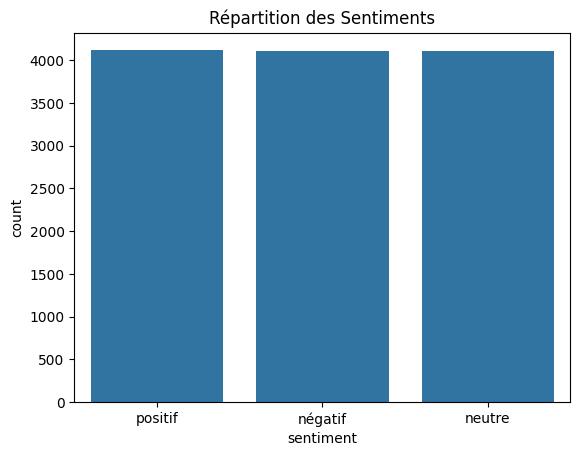

In [ ]:
sns.countplot(x='sentiment', data=Data_BO1)
plt.title("Répartition des Sentiments")
plt.show()

In [ ]:
print(Data_BO1['sentiment'].value_counts())

sentiment
positif    4117
négatif    4113
neutre     4111
Name: count, dtype: int64


# **V. Data Splitting**

### **1- Data Splitting**  
Split your data into training, validation, and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(Data_BO1, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(train_df)}")
print(f"Taille de l'ensemble de validation : {len(val_df)}")
print(f"Taille de l'ensemble de test : {len(test_df)}")

Taille de l'ensemble d'entraînement : 9872
Taille de l'ensemble de validation : 1234
Taille de l'ensemble de test : 1235


### **2- Saving Cleaned Data**  
Save the cleaned data for use in model fine-tuning.

In [ ]:
train_df.to_csv('train_data_BO1.csv', index=False)
val_df.to_csv('val_data_BO1.csv', index=False)
test_df.to_csv('test_data_BO1.csv', index=False)

### **3- Conversion to Hugging Face Compatible Format**  
The Hugging Face model requires a specific format for the data. We will convert the DataFrames into Dataset objects.

In [ ]:
from datasets import Dataset

# Conversion en format Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Affichage des informations sur les datasets
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset({
    features: ['reviewText', 'overall', 'category', 'summary', 'reviewText_length', 'word_count', 'sentiment', 'label', '__index_level_0__'],
    num_rows: 9872
})
Dataset({
    features: ['reviewText', 'overall', 'category', 'summary', 'reviewText_length', 'word_count', 'sentiment', 'label', '__index_level_0__'],
    num_rows: 1234
})
Dataset({
    features: ['reviewText', 'overall', 'category', 'summary', 'reviewText_length', 'word_count', 'sentiment', 'label', '__index_level_0__'],
    num_rows: 1235
})


# Modeling

# **Fine-Tuning NLP Models with Hugging Face**  
Structure the fine-tuning of NLP models.

## 2. Analyse des Corrélations entre Sentiments et Produits/Marques

Modèle : distilbert-base-uncased-finetuned-sst-2-english (Analyse de sentiment).

Objectif : Croiser les sentiments avec les produits/marques extraits.

In [ ]:
!pip install sympy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cud

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, pipeline
from datasets import Dataset
import openai

# Configuration de l'API OpenAI
openai.api_key = '##'

In [ ]:
# Vérifier les étiquettes
print("Valeurs uniques des étiquettes dans train_df :", train_df['label'].unique())
print("Valeurs uniques des étiquettes dans val_df :", val_df['label'].unique())
print("Valeurs uniques des étiquettes dans test_df :", test_df['label'].unique())

Valeurs uniques des étiquettes dans train_df : [2 1 0]
Valeurs uniques des étiquettes dans val_df : [1 0 2]
Valeurs uniques des étiquettes dans test_df : [0 2 1]


In [ ]:
# Charger le tokenizer et le modèle BERT
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 classes : NEGATIVE, NEUTRAL, POSITIVE

# Tokenizer les données
def tokenize_function(examples):
    return tokenizer(examples['reviewText'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Fonction pour calculer les métriques
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1234 [00:00<?, ? examples/s]

Map:   0%|          | 0/1235 [00:00<?, ? examples/s]

In [ ]:
# Définir les arguments d'entraînement
training_args = TrainingArguments(
    output_dir="./results_bert",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=7,
    weight_decay=0.01,
    logging_dir="./logs_bert",
    logging_steps=10,
    report_to="none",
)

# Définir le Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Fine-tuner le modèle
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.187600,0.179729,0.938412,0.942287,0.938412,0.937634
2,0.031200,0.172265,0.961102,0.962771,0.961102,0.960645
3,0.004300,0.199280,0.960292,0.962410,0.960292,0.959812
4,0.020200,0.114912,0.979741,0.980385,0.979741,0.979598
5,0.022200,0.122023,0.978120,0.978844,0.978120,0.977946
6,0.023200,0.194816,0.966775,0.968546,0.966775,0.966391
7,0.002900,0.149217,0.973258,0.974340,0.973258,0.972995


TrainOutput(global_step=4319, training_loss=0.10014658747968665, metrics={'train_runtime': 6513.6741, 'train_samples_per_second': 10.609, 'train_steps_per_second': 0.663, 'total_flos': 1.818218961867571e+16, 'train_loss': 0.10014658747968665, 'epoch': 7.0})

In [ ]:
from sklearn.metrics import accuracy_score

# Prédictions sur le jeu de test
predictions = trainer.predict(test_dataset)

# Obtenir les prédictions et les labels réels
pred_labels = predictions.predictions.argmax(axis=-1)  # Si c'est un problème de classification
true_labels = predictions.label_ids

# Calcul de la précision ou d'autres métriques
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy on test data: {accuracy}")

# Si tu veux d'autres métriques comme la précision, le rappel ou le F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy on test data: 0.977327935222672
Precision: 0.9782672339490339
Recall: 0.977327935222672
F1 Score: 0.9771774999388797


In [ ]:
# Sauvegarder le modèle fine-tuné
model_path = "./fine_tuned_bert_model"
trainer.save_model(model_path)

# Sauvegarder le tokenizer séparément
tokenizer.save_pretrained(model_path)

print("\nLe modèle BERT fine-tuné a été sauvegardé avec succès.")


Le modèle BERT fine-tuné a été sauvegardé avec succès.


# Test sentiment

In [36]:
# Charger le modèle fine-tuné pour l'inférence
sentiment_pipeline = pipeline("text-classification", model=model_path, tokenizer=model_path)
# Tester avec des exemples de reviews
reviews = [
    "This product is amazing! I love it.",  # POSITIVE
    "The quality is terrible and it broke after one use.",  # NEGATIVE
    "I was expecting more. The product is just okay.",  # POSITIVE
    "Absolutely fantastic! Best purchase ever.",  # POSITIVE
    "lather well noticed difference hair",  # NEUTRAL
    "The shampoo lathers well but I didn't notice a huge difference in my hair",  # NEUTRAL
]

# Obtenir les prédictions
sentiment_counts = {'LABEL_0': 0, 'LABEL_1': 0, 'LABEL_2': 0} # Updated to match model's output
sentiment_examples = {'LABEL_0': [], 'LABEL_1': [], 'LABEL_2': []} # Updated to match model's output

for review in reviews:
    sentiment_result = sentiment_pipeline(review)
    sentiment_label = sentiment_result[0]['label']
    sentiment_counts[sentiment_label] += 1
    sentiment_examples[sentiment_label].append(review)

# Afficher les résultats regroupés
print("Résultats regroupés par sentiment:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} avis")
    print("Exemples d'avis:")
    for example in sentiment_examples[sentiment]:
        print(f"  - {example}")
    print()

Device set to use cuda:0


Résultats regroupés par sentiment:
LABEL_0: 0 avis
Exemples d'avis:

LABEL_1: 1 avis
Exemples d'avis:
  - lather well noticed difference hair

LABEL_2: 5 avis
Exemples d'avis:
  - This product is amazing! I love it.
  - The quality is terrible and it broke after one use.
  - I was expecting more. The product is just okay.
  - Absolutely fantastic! Best purchase ever.
  - The shampoo lathers well but I didn't notice a huge difference in my hair



# Souvegarde hagging face

In [ ]:
!pip install huggingface_hub

In [39]:
import os
from huggingface_hub import login

HF_TOKEN = os.environ.get('HF_TOKEN')

login(token=HF_TOKEN)


In [41]:
from huggingface_hub import create_repo

# Nom du dépôt que tu souhaites créer sur Hugging Face
repo_name = "Nourhen2001/fine-tuned-bert-sentiment-v1"  # Assure-toi d'utiliser un nom unique

# Créer un dépôt
create_repo(repo_name, private=False)  # private=True pour un dépôt privé, change à False si public


RepoUrl('https://huggingface.co/Nourhen2001/fine-tuned-bert-sentiment-v1', endpoint='https://huggingface.co', repo_type='model', repo_id='Nourhen2001/fine-tuned-bert-sentiment-v1')

In [42]:
from huggingface_hub import HfApi

# Le chemin local du modèle
model_path = "./fine_tuned_bert_model"

# Le nom du dépôt sur Hugging Face
repo_name = "Nourhen2001/fine-tuned-bert-sentiment-v1"  # Utilise le même nom que précédemment

# Initialiser l'API Hugging Face
api = HfApi()

# Uploader les fichiers du modèle vers Hugging Face
api.upload_folder(
    folder_path=model_path,  # Dossier où ton modèle est sauvegardé
    repo_id=repo_name,  # Nom du dépôt
    repo_type="model",  # Type de dépôt : 'model'
    token=HF_TOKEN  # Ton token d'authentification Hugging Face
)

# Uploader le tokenizer
tokenizer.push_to_hub(repo_name, token=HF_TOKEN)

print(f"Le modèle et le tokenizer ont été sauvegardés avec succès sur Hugging Face : https://huggingface.co/{repo_name}")


training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Le modèle et le tokenizer ont été sauvegardés avec succès sur Hugging Face : https://huggingface.co/Nourhen2001/fine-tuned-bert-sentiment-v1


In [43]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Nom du modèle sur Hugging Face
model_name = "Nourhen2001/fine-tuned-bert-sentiment-v1"

# Charger le modèle fine-tuné
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Charger le tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

print("Le modèle et le tokenizer ont été chargés avec succès.")


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Le modèle et le tokenizer ont été chargés avec succès.


In [44]:
# Exemple de texte à tester
text = "This product is amazing! I love it."

# Tokeniser l'exemple de texte
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Effectuer une prédiction avec le modèle
outputs = model(**inputs)

# Extraire la prédiction (logits) et appliquer une fonction d'activation pour obtenir les résultats
import torch
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=-1)

# Afficher la classe prédite
print(f"Classe prédite : {predicted_class.item()}")


Classe prédite : 2


In [45]:
# Exemple de texte à tester
text = "This product is amazing! I love it."

# Tokeniser l'exemple de texte
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Effectuer une prédiction avec le modèle
outputs = model(**inputs)

# Extraire les logits (probabilités brutes) et appliquer la fonction softmax
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Trouver l'index de la classe avec la plus haute probabilité
predicted_class_index = torch.argmax(probabilities, dim=-1).item()

# Mapper l'indice à une étiquette de classe
class_labels = ["negative", "neutral", "positive"]  # Remplacer par les étiquettes spécifiques à ton modèle
predicted_class_label = class_labels[predicted_class_index]

# Afficher la classe prédite
print(f"Classe prédite : {predicted_class_label}")

Classe prédite : positive


In [46]:
# Exemple de texte à tester (Négatif)
text = "I hated the product. It was awful and didn't work as expected."

# Tokeniser l'exemple de texte
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Effectuer une prédiction avec le modèle
outputs = model(**inputs)

# Extraire les logits (probabilités brutes) et appliquer la fonction softmax
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Trouver l'index de la classe avec la plus haute probabilité
predicted_class_index = torch.argmax(probabilities, dim=-1).item()

# Mapper l'indice à une étiquette de classe
class_labels = ["negative", "neutral", "positive"]  # Remplacer par les étiquettes spécifiques à ton modèle
predicted_class_label = class_labels[predicted_class_index]

# Afficher la classe prédite
print(f"Classe prédite : {predicted_class_label}")

Classe prédite : negative


In [48]:
# Exemple de texte à tester (Neutre)
text = "lather well noticed difference hair"

# Tokeniser l'exemple de texte
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Effectuer une prédiction avec le modèle
outputs = model(**inputs)

# Extraire les logits (probabilités brutes) et appliquer la fonction softmax
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Trouver l'index de la classe avec la plus haute probabilité
predicted_class_index = torch.argmax(probabilities, dim=-1).item()

# Mapper l'indice à une étiquette de classe
class_labels = ["negative", "neutral", "positive"]  # Remplacer par les étiquettes spécifiques à ton modèle
predicted_class_label = class_labels[predicted_class_index]

# Afficher la classe prédite
print(f"Classe prédite : {predicted_class_label}")

Classe prédite : neutral
